In [ ]:
!pip install pandas
!pip install matplotlib
!pip install tensorflow

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [71]:
# Path to the file
file_path = './output/frame_trajectory.txt'

# Read the space-separated txt file into a DataFrame
df = pd.read_table(file_path, delim_whitespace=True, header=None, 
                   names=['timestamp', 'x', 'y', 'z', 'qx', 'qy', 'qz', 'qw'])

# Print the first 10 values of x, y, z columns
print(df[['timestamp','x', 'y', 'z']].head(2))


   timestamp         x         y         z
0   0.433767 -0.000000 -0.000000 -0.000000
1   0.533867  0.000237 -0.001058  0.012539


/tmp/ipykernel_1354/3656705580.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(file_path, delim_whitespace=True, header=None,


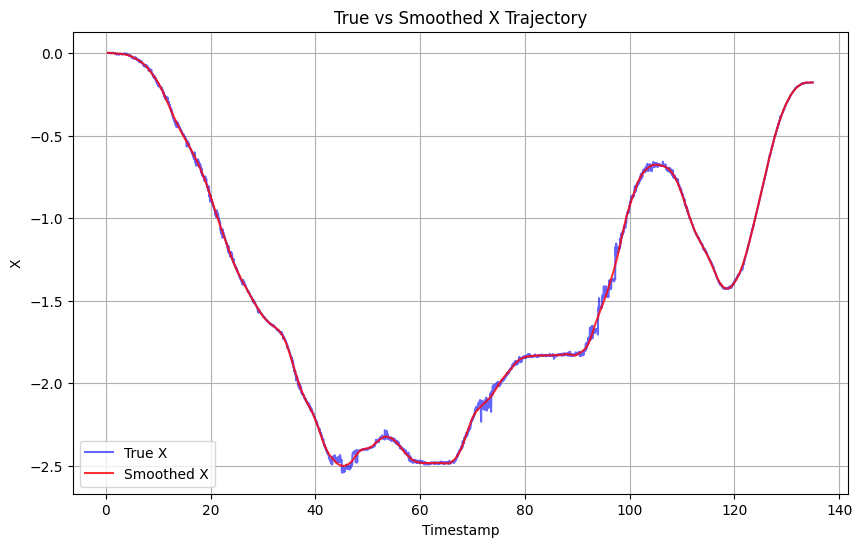

In [72]:
x_values = df['x'].values  # Replace with your actual 'x' values from DataFrame

# Apply the Savitzky-Golay filter to smooth the data
# window_length is the size of the filter window (it should be an odd number)
# polyorder is the order of the polynomial used to fit the filter
# MUST: config window_length and polyorder manually, ask gpt how that work
smoothed_x = savgol_filter(x_values, window_length=256, polyorder=4)

# Plot the original (true) data vs. the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], x_values, label='True X', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smoothed_x, label='Smoothed X', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('True vs Smoothed X Trajectory')
plt.legend()
plt.grid(True)
plt.show()


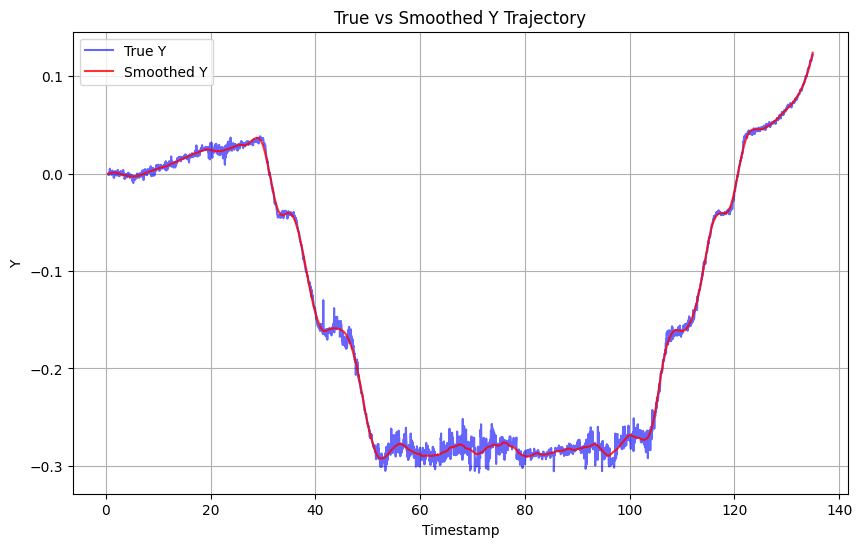

In [73]:
y_values = df['y'].values
smoothed_y = savgol_filter(y_values, window_length=256+8, polyorder=4)

# Plot the original (true) data vs. the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], y_values, label='True Y', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smoothed_y, label='Smoothed Y', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('Y')
plt.title('True vs Smoothed Y Trajectory')
plt.legend()
plt.grid(True)
plt.show()


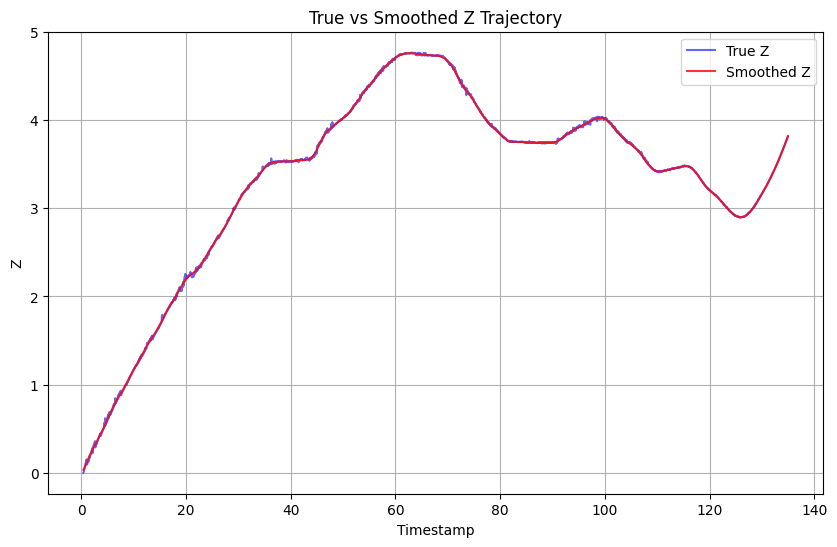

In [74]:
z_values = df['z'].values
smoothed_z = savgol_filter(z_values, window_length=256, polyorder=6)

# Plot the original (true) data vs. the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], z_values, label='True Z', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smoothed_z, label='Smoothed Z', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('Z')
plt.title('True vs Smoothed Z Trajectory')
plt.legend()
plt.grid(True)
plt.show()
  

In [76]:
# Begin smoothing quaternions
def smooth_column(threshold, window_lengths, polyorders, df_col_name):
    """
    Smooths a column in the global DataFrame using Savitzky-Golay filter over chunks where 
    the difference in consecutive values is greater than the threshold.

    Parameters:
    - threshold (float): The threshold for detecting significant differences between consecutive values.
    - window_lengths (list of int): List of window lengths for Savitzky-Golay filter for each chunk.
    - polyorders (list of int): List of polynomial orders for Savitzky-Golay filter for each chunk.
    - df_col_name (str): The column name in the global DataFrame to smooth.

    Returns:
    - None (The global DataFrame `df` will be modified in place).
    """
    
    indices_list = [0]
    
    # Iterate through the DataFrame to find chunks based on threshold
    for i in range(1, len(df)):
        if abs(df[df_col_name][i] - df[df_col_name][i-1]) > threshold:
            if indices_list[-1] != i-1:
                indices_list.append(i)
                
    # Add the final index (end of the DataFrame)
    if indices_list[-1] != len(df)-1:
        indices_list.append(len(df))
    
    n_chunk = len(indices_list) - 1
    print("Number of chunks: ",n_chunk)
    
    # Create a new column for the smoothed data
    df[f'smoothed_{df_col_name}'] = df[df_col_name]
    
    # Apply Savitzky-Golay filter to each chunk
    for i in range(n_chunk):
        df[f'smoothed_{df_col_name}'][indices_list[i]:indices_list[i+1]] = savgol_filter(
            df[df_col_name][indices_list[i]:indices_list[i+1]], 
            window_length=window_lengths[i], 
            polyorder=polyorders[i]
        )
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df[df_col_name], label=f'Original {df_col_name}', color='r')
    plt.plot(df['timestamp'], df[f'smoothed_{df_col_name}'], label=f'Smoothed {df_col_name}', color='b')
    plt.xlabel('Timestamp')
    plt.ylabel(df_col_name)
    plt.title(f'Comparison of Original and Smoothed {df_col_name}')
    plt.grid(True)
    plt.legend()
    plt.show()

Number of chunks:  3


/tmp/ipykernel_1354/493492546.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f'smoothed_{df_col_name}'][indices_list[i]:indices_list[i+1]] = savgol_filter(


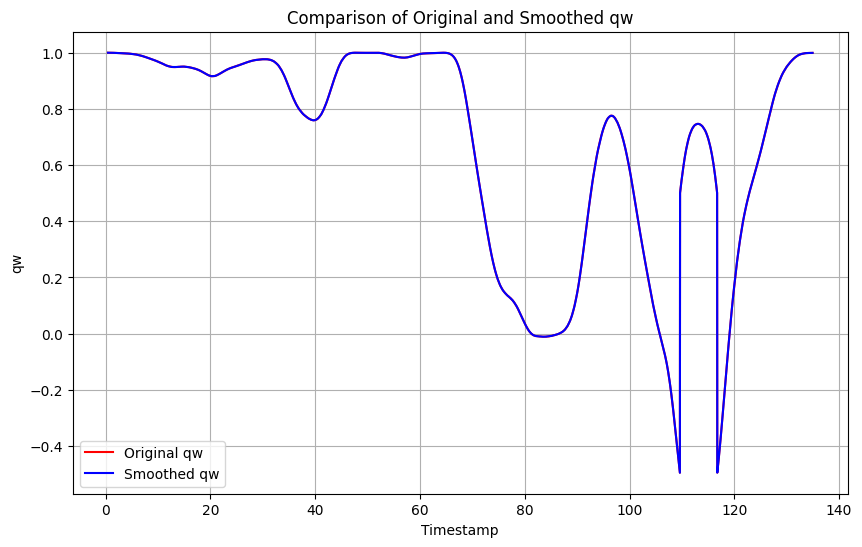

In [ ]:
# README: How to tune the hyper param
# 1.See graph, edit threshold till number of chunks is true to graph
# 2.Set window_lenghts and polyorders len as number of chunks, fine-tune these hyperparam depend on each chunk
threshold = 0.5
window_lengths = [5, 5, 5]
polyorders = [2, 2, 2]
df_col_name = 'qw'

# Call the function (assuming df is already defined globally)
smooth_column(threshold, window_lengths, polyorders, df_col_name)

Number of chunks:  1


/tmp/ipykernel_1354/493492546.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f'smoothed_{df_col_name}'][indices_list[i]:indices_list[i+1]] = savgol_filter(


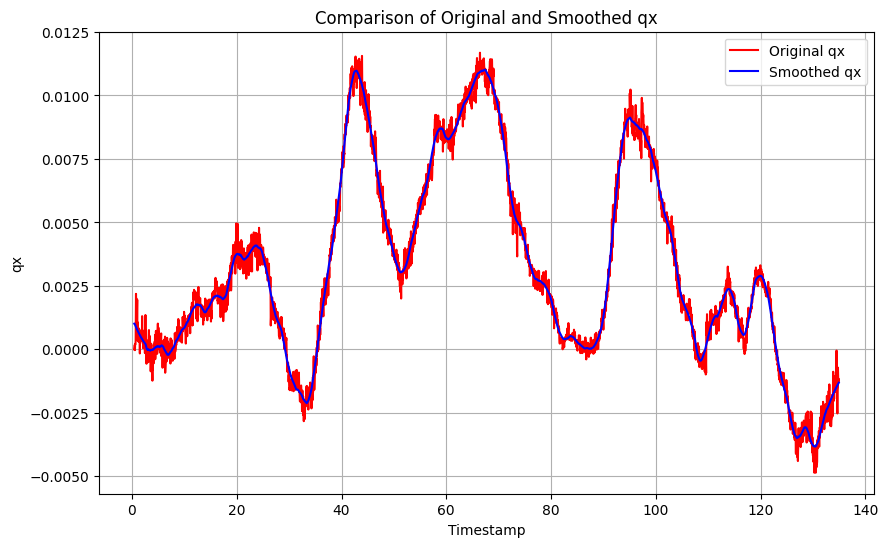

In [78]:
threshold = 0.5
window_lengths = [128]
polyorders = [2]
df_col_name = 'qx'

# Call the function (assuming df is already defined globally)
smooth_column(threshold, window_lengths, polyorders, df_col_name)

Number of chunks:  3


/tmp/ipykernel_1354/493492546.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f'smoothed_{df_col_name}'][indices_list[i]:indices_list[i+1]] = savgol_filter(


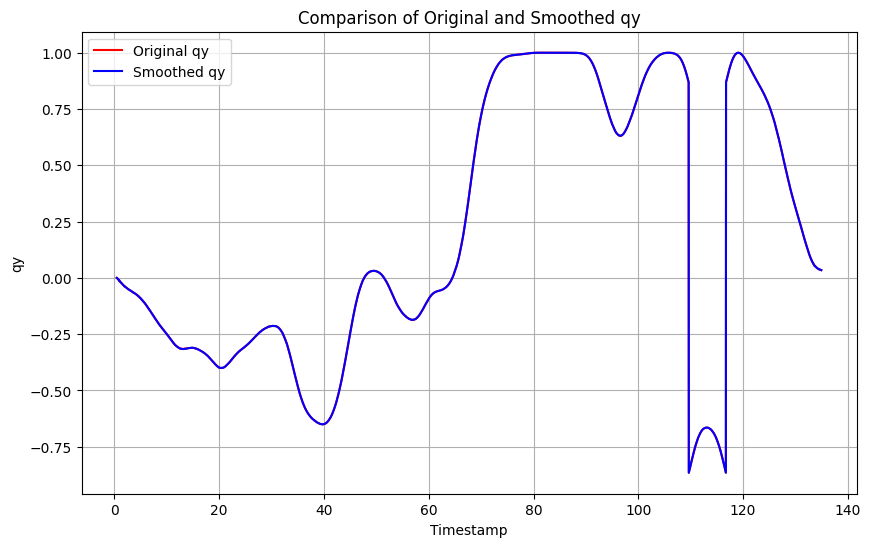

In [79]:
threshold = 0.5
window_lengths = [5,5,5]
polyorders = [2,2,2]
df_col_name = 'qy'

# Call the function (assuming df is already defined globally)
smooth_column(threshold, window_lengths, polyorders, df_col_name)


Number of chunks:  3


/tmp/ipykernel_1354/493492546.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f'smoothed_{df_col_name}'][indices_list[i]:indices_list[i+1]] = savgol_filter(


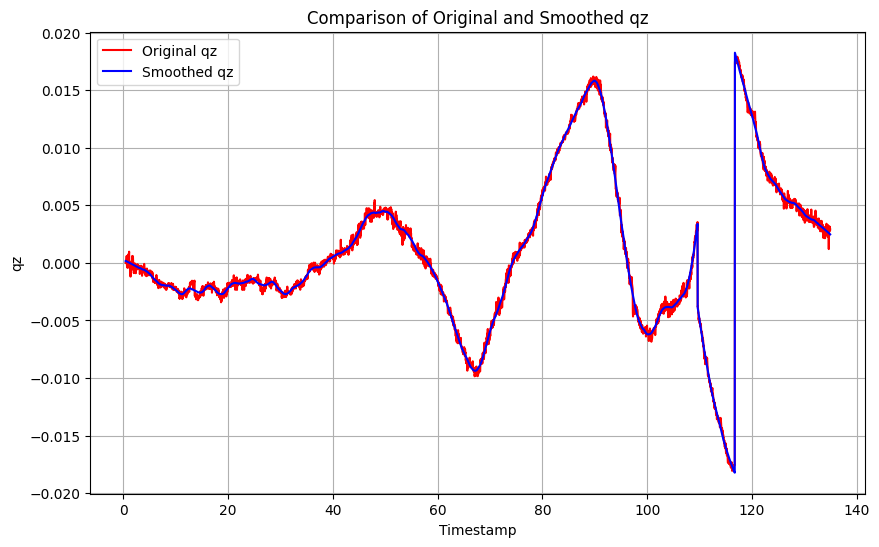

In [80]:
threshold = 0.006
window_lengths = [128,128,128]
polyorders = [2,2,2]
df_col_name = 'qz'
smooth_column(threshold, window_lengths, polyorders, df_col_name)

In [81]:
columns_to_normalize = ['smoothed_qw', 'smoothed_qx', 'smoothed_qy', 'smoothed_qz']

# Function to normalize each row (quaternion)
def normalize_quaternion(row):
    norm = np.sqrt(row['smoothed_qw']**2 + row['smoothed_qx']**2 + row['smoothed_qy']**2 + row['smoothed_qz']**2)
    row['smoothed_qw'] /= norm
    row['smoothed_qx'] /= norm
    row['smoothed_qy'] /= norm
    row['smoothed_qz'] /= norm
    return row

# Apply the normalization to each row
df = df.apply(normalize_quaternion, axis=1)

In [82]:
#Save the smoothed data to new file
smoothed_df = pd.DataFrame({
    'timestamp': df['timestamp'],
    'x': smoothed_x,
    'y': smoothed_y,
    'z': smoothed_z,
    'qx': df['smoothed_qx'],
    'qy': df['smoothed_qy'],
    'qz': df['smoothed_qz'],
    'qw': df['smoothed_qw']
})

# Export to smoothed_trajectory.txt
output_path = './output/smoothed_trajectory.txt'
smoothed_df.to_csv(output_path, sep=' ', index=False, header=False)